# SVM

### SUPPORT VECTOR CLASSIFIER

In [65]:
# liberaries
# for data manupulation 
import pandas as pd
import numpy as np

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pe

# setting graph parameters
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline

# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# for model and data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [4]:
# read dataset
df = pd.read_csv('https://raw.githubusercontent.com/dhanesh-sakre/DATA-SCIENCE/refs/heads/main/SVM/Wine.csv')
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     1050                 1  
2   3.17     1185                 1  
3   3.45     1480                 1  
4   2.93      735                 1

In [ ]:
# Customer_Segment is the target column and I need to classify the customer segment on the basis of these features

# EDA

In [19]:
# descriptive statistics 


Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  Customer_Segment  
count       178.000000  178.000000  178.000000   178.000000        178.000000  
mean          5.058090    0.957449    2.611685   746.893258          1.938202  
std           2.318286    0.228572    0.709990   314.907474          0.775035  
min           1.280000    0.480000    1.270000   278.000000          1.000000  
25%           3.220000    0.782500    1.937500   500.500000          1.000000  
50%           4.690000    0.965000    2.780000   673.500000          2.000000  
75%           6.200000    1.120000    3.170000   985.000000          3.000000  
max          13.000000    1.710000    4.000000  1680.000000          3.000000

In [ ]:
# no missing values
# some columns are skewed and
# there is posibility of the outliers in some of the columns like proline

<Axes: xlabel='Alcohol', ylabel='Ash'>

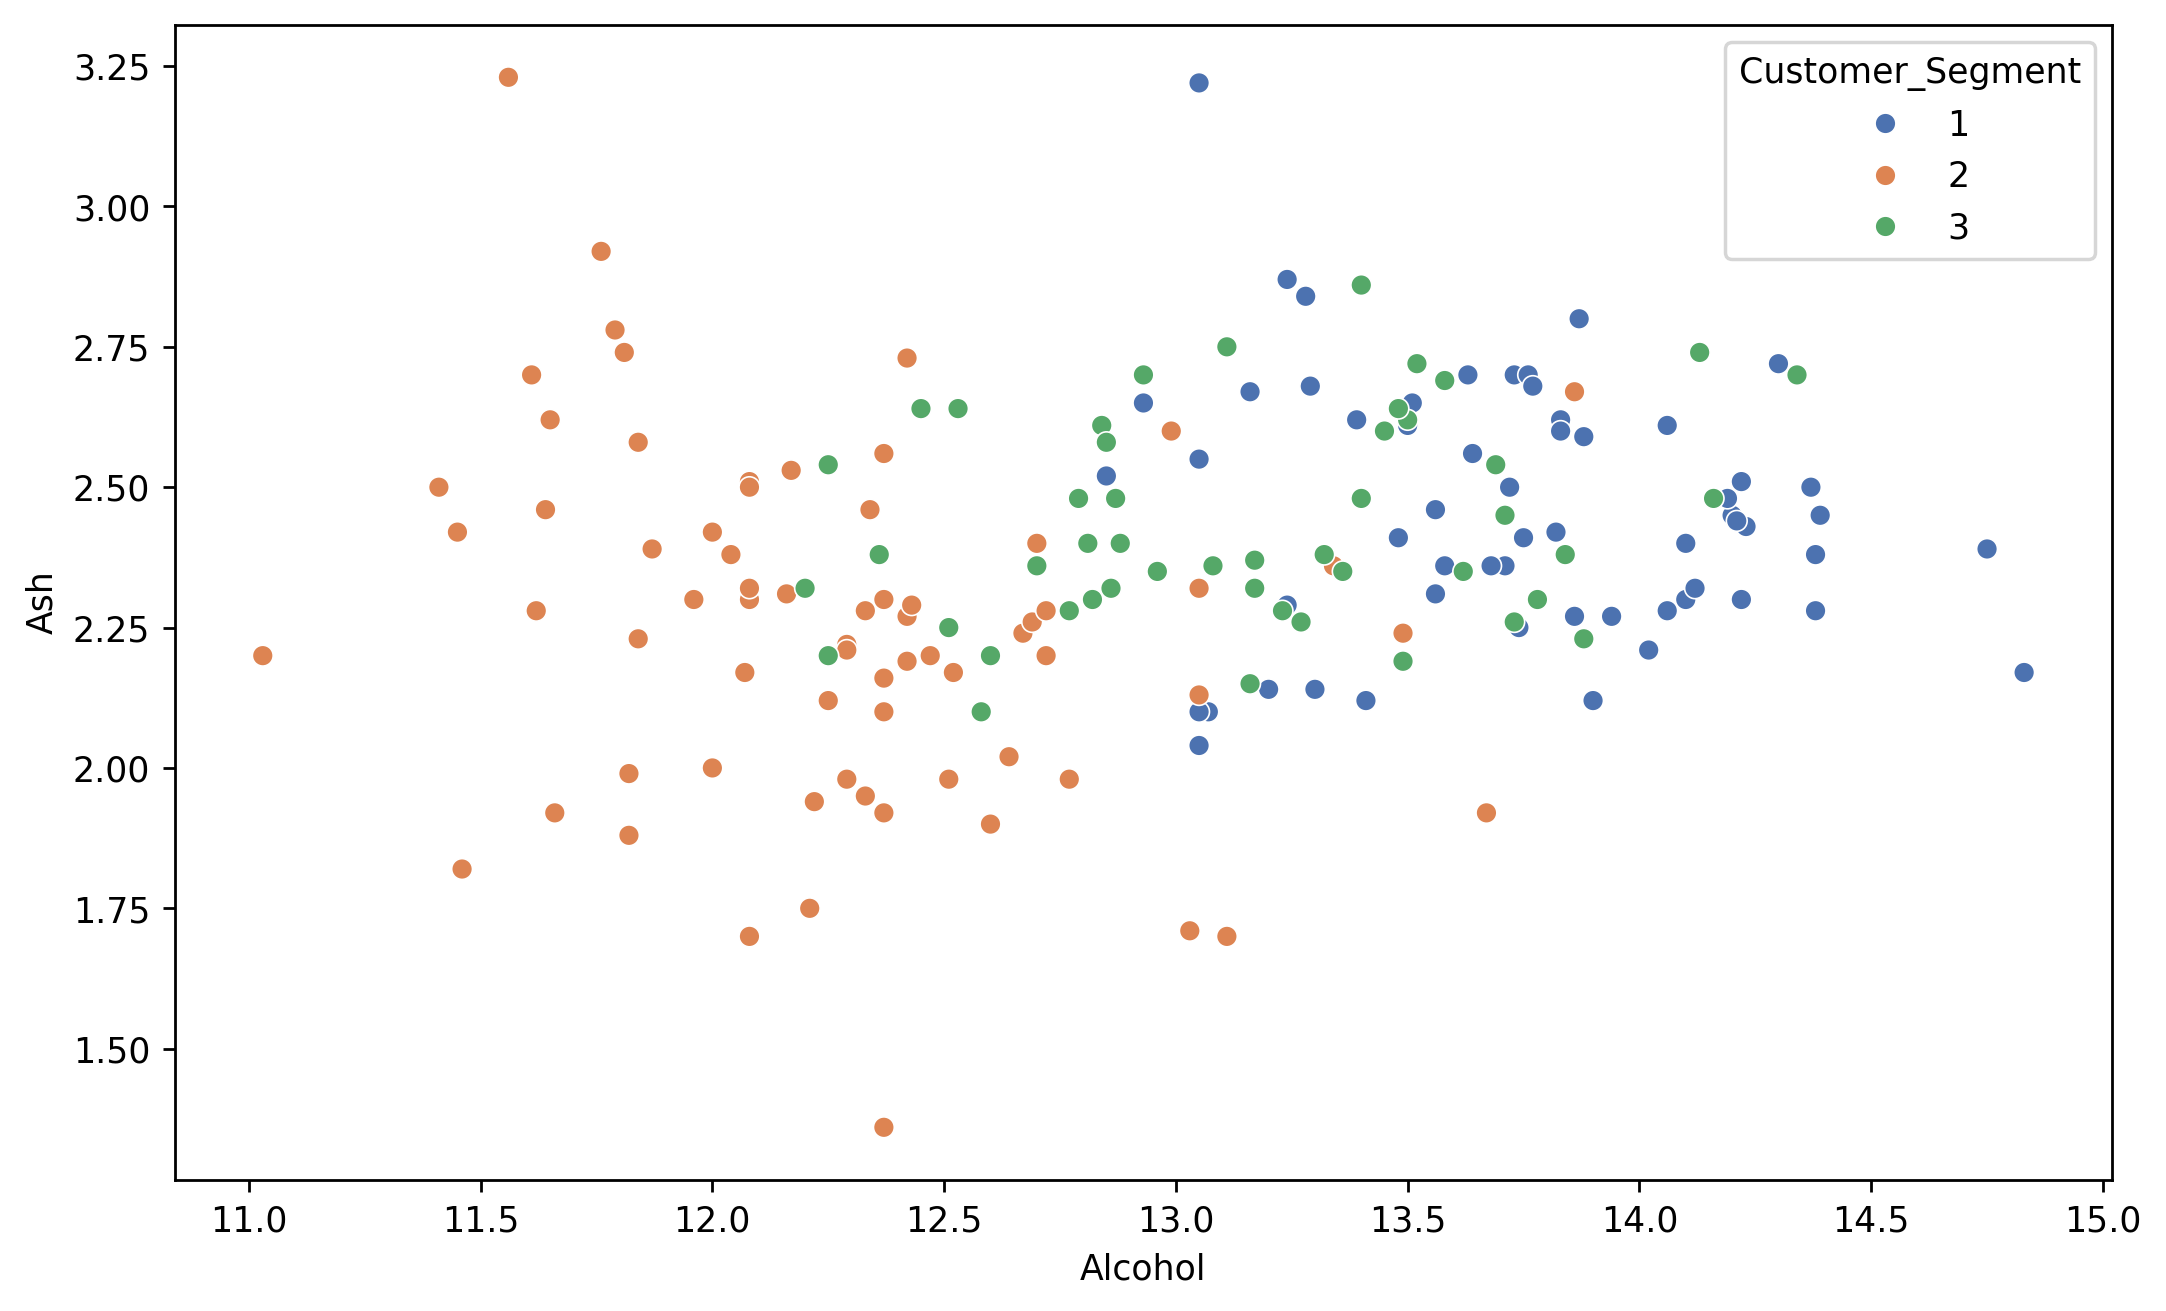

In [10]:
# just for sake of getting an idea of distribution of classes plotting a graph

sns.scatterplot(data=df, x='Alcohol', y='Ash', hue='Customer_Segment', palette='deep')

In [12]:
df.head(3)

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     1050                 1  
2   3.17     1185                 1

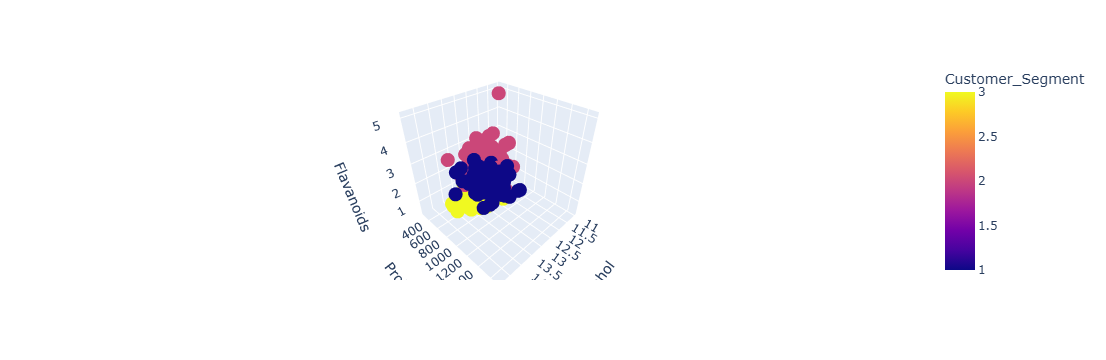

In [16]:
# 3D graph betweemn Alcohol, Flavanoids, Proline columns data

pe.scatter_3d(data_frame=df, x='Alcohol', y='Proline', z='Flavanoids', color='Customer_Segment')

In [ ]:
# I have taken some random columns just to get the idea about the distribution of the data,
# because data is present in the 14 dimensions so I can not visualize the whole dataset on one graph

In [17]:
df.shape

(178, 14)

In [18]:
# checking for null valuess
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [20]:
# checking duplicated
df.duplicated().sum()

0

In [39]:
df.head(3)

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6      127.0           2.80   
1    13.20        1.78  2.14          11.2      100.0           2.65   
2    13.16        2.36  2.67          18.6      101.0           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   

   OD280  Proline  Customer_Segment  
0   3.92   1065.0               1.0  
1   3.40   1050.0               1.0  
2   3.17   1185.0               1.0

In [38]:
# checking datatypes
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium               float64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                 float64
Customer_Segment        float64
dtype: object

In [22]:
# correlation between the columns
df.corr()

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
Alcohol               1.000000    0.094397  0.211545     -0.310235   0.270798   
Malic_Acid            0.094397    1.000000  0.164045      0.288500  -0.054575   
Ash                   0.211545    0.164045  1.000000      0.443367   0.286587   
Ash_Alcanity         -0.310235    0.288500  0.443367      1.000000  -0.083333   
Magnesium             0.270798   -0.054575  0.286587     -0.083333   1.000000   
Total_Phenols         0.289101   -0.335167  0.128980     -0.321113   0.214401   
Flavanoids            0.236815   -0.411007  0.115077     -0.351370   0.195784   
Nonflavanoid_Phenols -0.155929    0.292977  0.186230      0.361922  -0.256294   
Proanthocyanins       0.136698   -0.220746  0.009652     -0.197327   0.236441   
Color_Intensity       0.546364    0.248985  0.258887      0.018732   0.199950   
Hue                  -0.071747   -0.561296 -0.074667     -0.273955   0.055398   
OD280                 0.072343   -0.368710  0.003911     -0.276769   0.066004   
Proline               0.643720   -0.192011  0.223626     -0.440597   0.393351   
Customer_Segment     -0.328222    0.437776 -0.049643      0.517859  -0.209179   

                      Total_Phenols  Flavanoids  Nonflavanoid_Phenols  \
Alcohol                    0.289101    0.236815             -0.155929   
Malic_Acid                -0.335167   -0.411007              0.292977   
Ash                        0.128980    0.115077              0.186230   
Ash_Alcanity              -0.321113   -0.351370              0.361922   
Magnesium                  0.214401    0.195784             -0.256294   
Total_Phenols              1.000000    0.864564             -0.449935   
Flavanoids                 0.864564    1.000000             -0.537900   
Nonflavanoid_Phenols      -0.449935   -0.537900              1.000000   
Proanthocyanins            0.612413    0.652692             -0.365845   
Color_Intensity           -0.055136   -0.172379              0.139057   
Hue                        0.433681    0.543479             -0.262640   
OD280                      0.699949    0.787194             -0.503270   
Proline                    0.498115    0.494193             -0.311385   
Customer_Segment          -0.719163   -0.847498              0.489109   

                      Proanthocyanins  Color_Intensity       Hue     OD280  \
Alcohol                      0.136698         0.546364 -0.071747  0.072343   
Malic_Acid                  -0.220746         0.248985 -0.561296 -0.368710   
Ash                          0.009652         0.258887 -0.074667  0.003911   
Ash_Alcanity                -0.197327         0.018732 -0.273955 -0.276769   
Magnesium                    0.236441         0.199950  0.055398  0.066004   
Total_Phenols                0.612413        -0.055136  0.433681  0.699949   
Flavanoids                   0.652692        -0.172379  0.543479  0.787194   
Nonflavanoid_Phenols        -0.365845         0.139057 -0.262640 -0.503270   
Proanthocyanins              1.000000        -0.025250  0.295544  0.519067   
Color_Intensity             -0.025250         1.000000 -0.521813 -0.428815   
Hue                          0.295544        -0.521813  1.000000  0.565468   
OD280                        0.519067        -0.428815  0.565468  1.000000   
Proline                      0.330417         0.316100  0.236183  0.312761   
Customer_Segment            -0.499130         0.265668 -0.617369 -0.788230   

                       Proline  Customer_Segment  
Alcohol               0.643720         -0.328222  
Malic_Acid           -0.192011          0.437776  
Ash                   0.223626         -0.049643  
Ash_Alcanity         -0.440597          0.517859  
Magnesium             0.393351         -0.209179  
Total_Phenols         0.498115         -0.719163  
Flavanoids            0.494193         -0.847498  
Nonflavanoid_Phenols -0.311385          0.489109  
Proanthocyanins       0.330417         -0.499130  
Color_Intensity       0.316100

In [37]:
# unique values in the target columns
df.Customer_Segment.unique()

array([1., 2., 3.])

In [55]:
# checkingn data is balanced or not
df['Customer_Segment'].value_counts()

Customer_Segment
2.0    71
1.0    59
3.0    48
Name: count, dtype: int64

In [ ]:
# yes it is balanced dataset

In [ ]:
# there are 3 calsses 1, 2, 3

<Axes: >

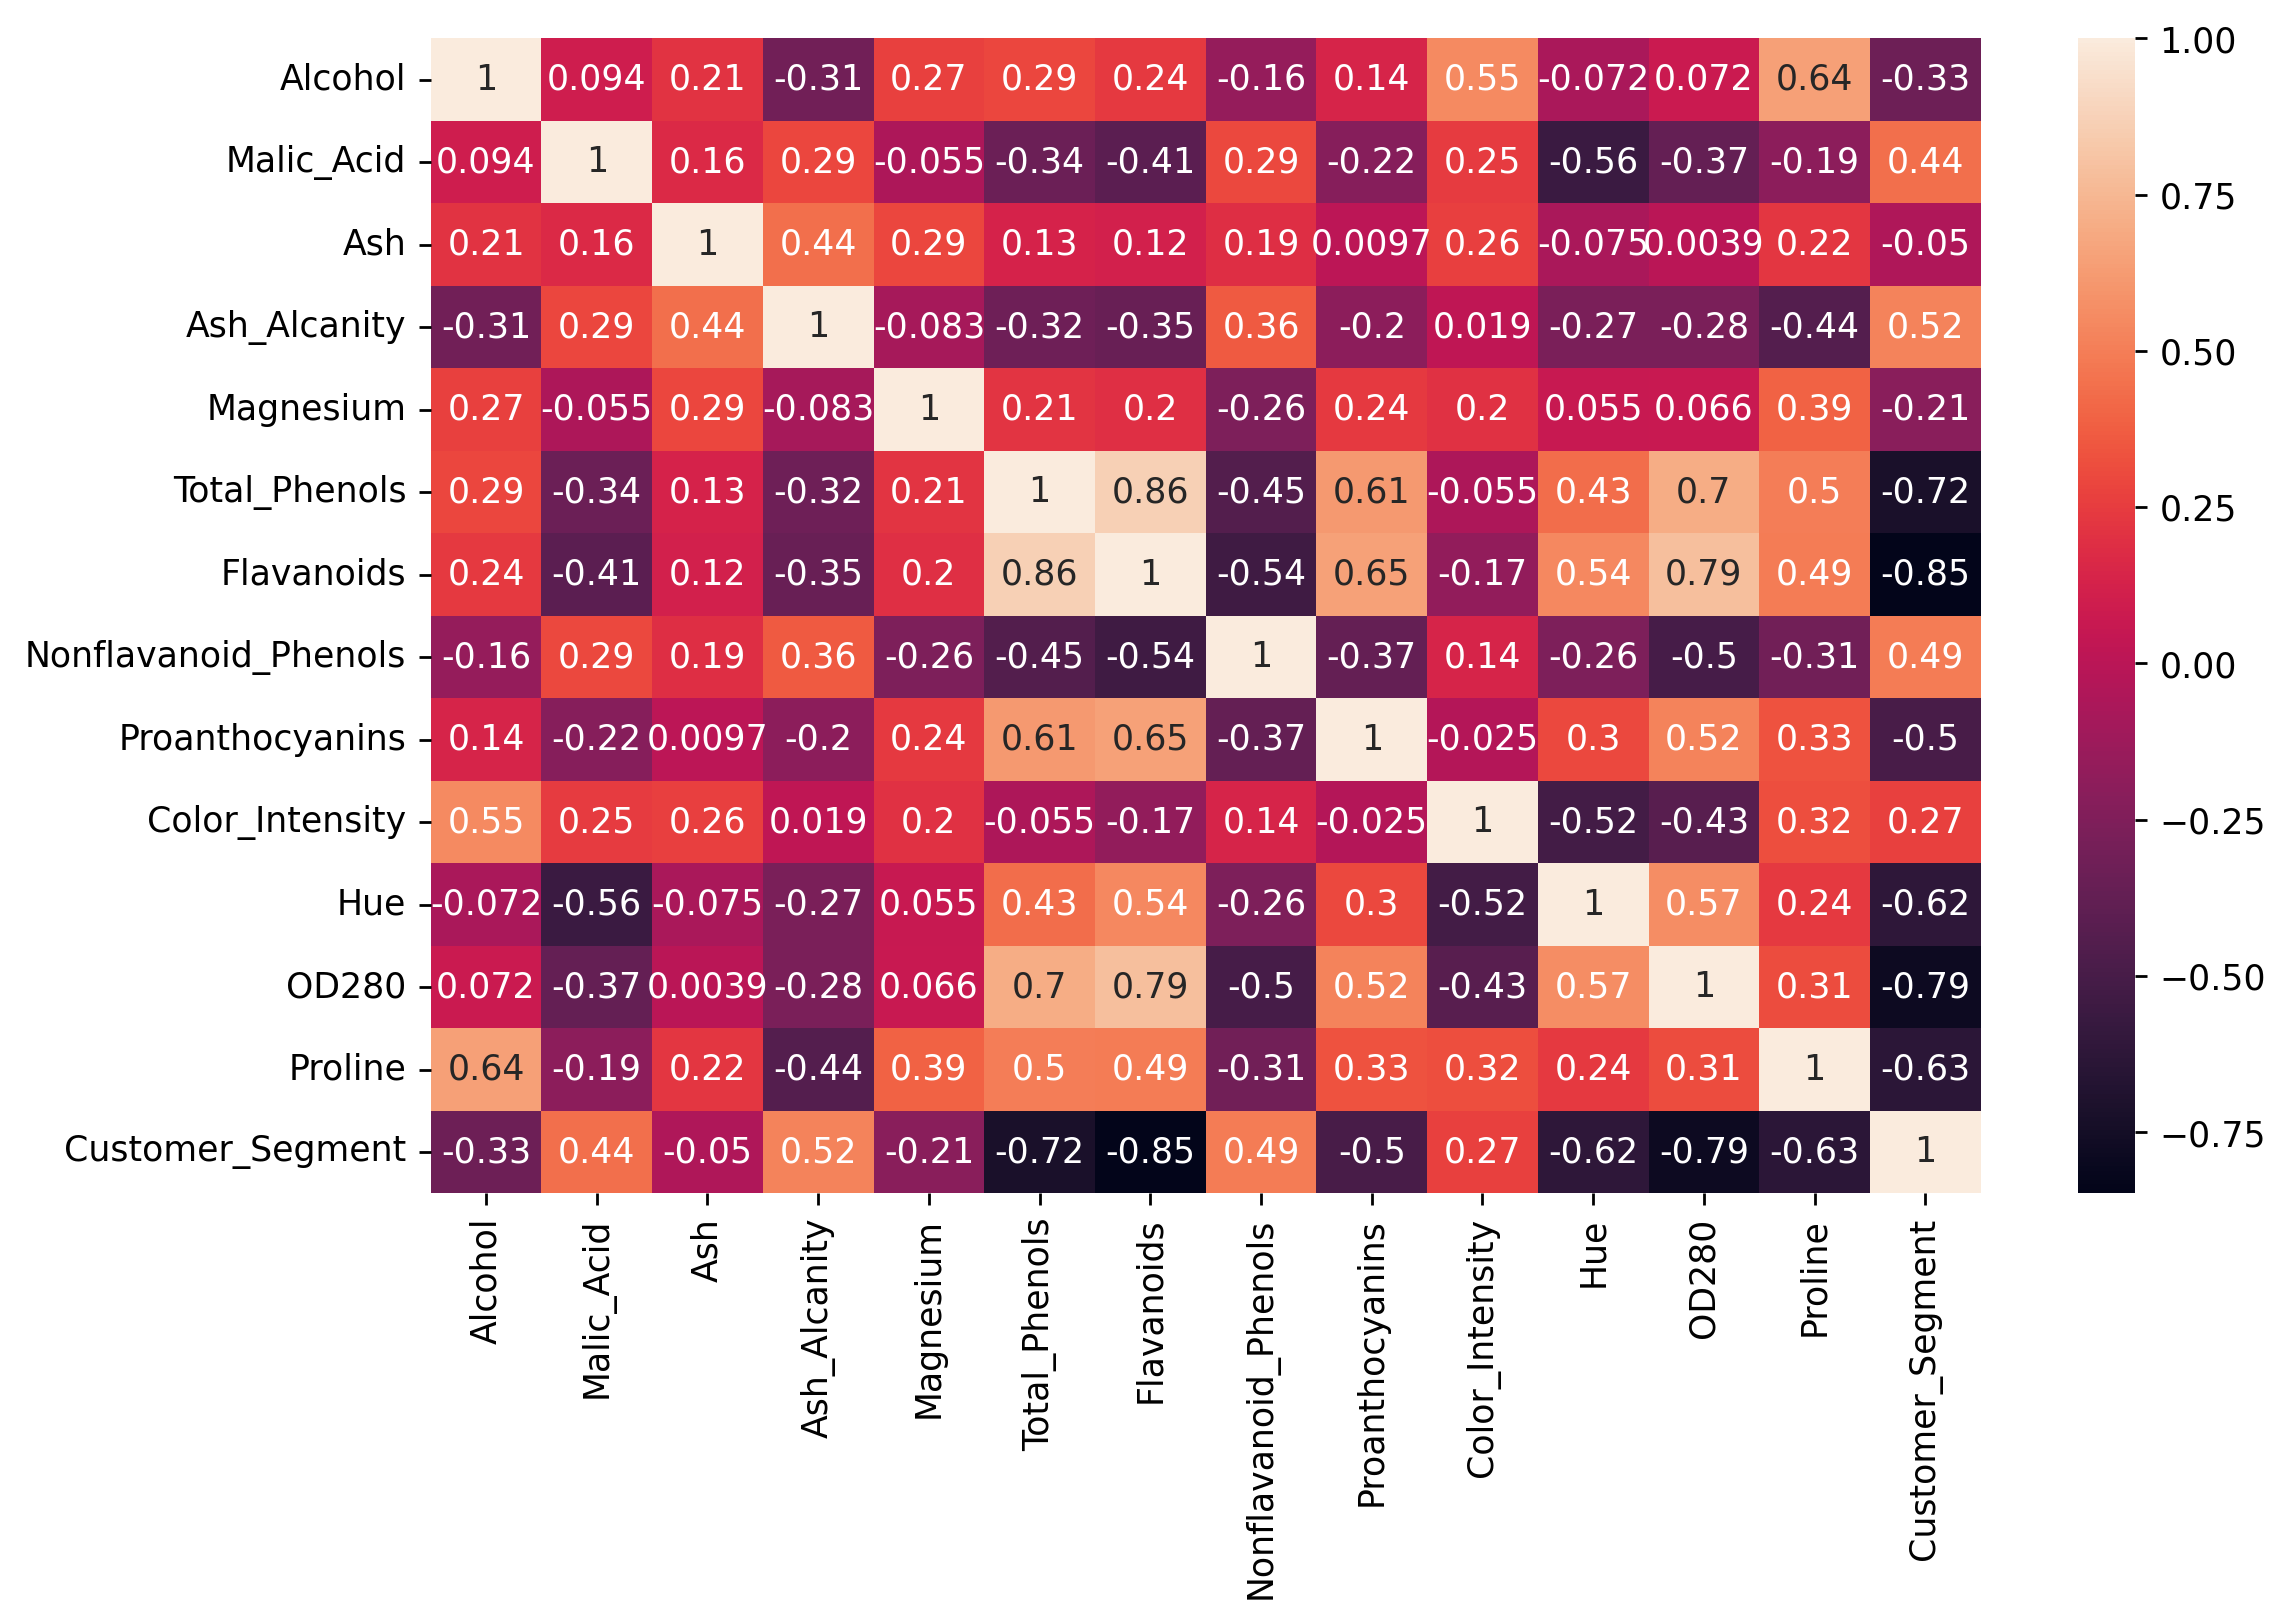

In [23]:
# heatmap for correlation
sns.heatmap(df.corr(), annot=True)

In [24]:
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     1050                 1  
2   3.17     1185                 1  
3   3.45     1480                 1  
4   2.93      735                 1

In [ ]:
# Proanthocyanins and Color_Intensity columns are weakly related to Customer_Segment (target column)
# Total_Phenols, OD280 columns are highly related to the target column Customer_Segment
# I also can observe relationship between taget and other columns 

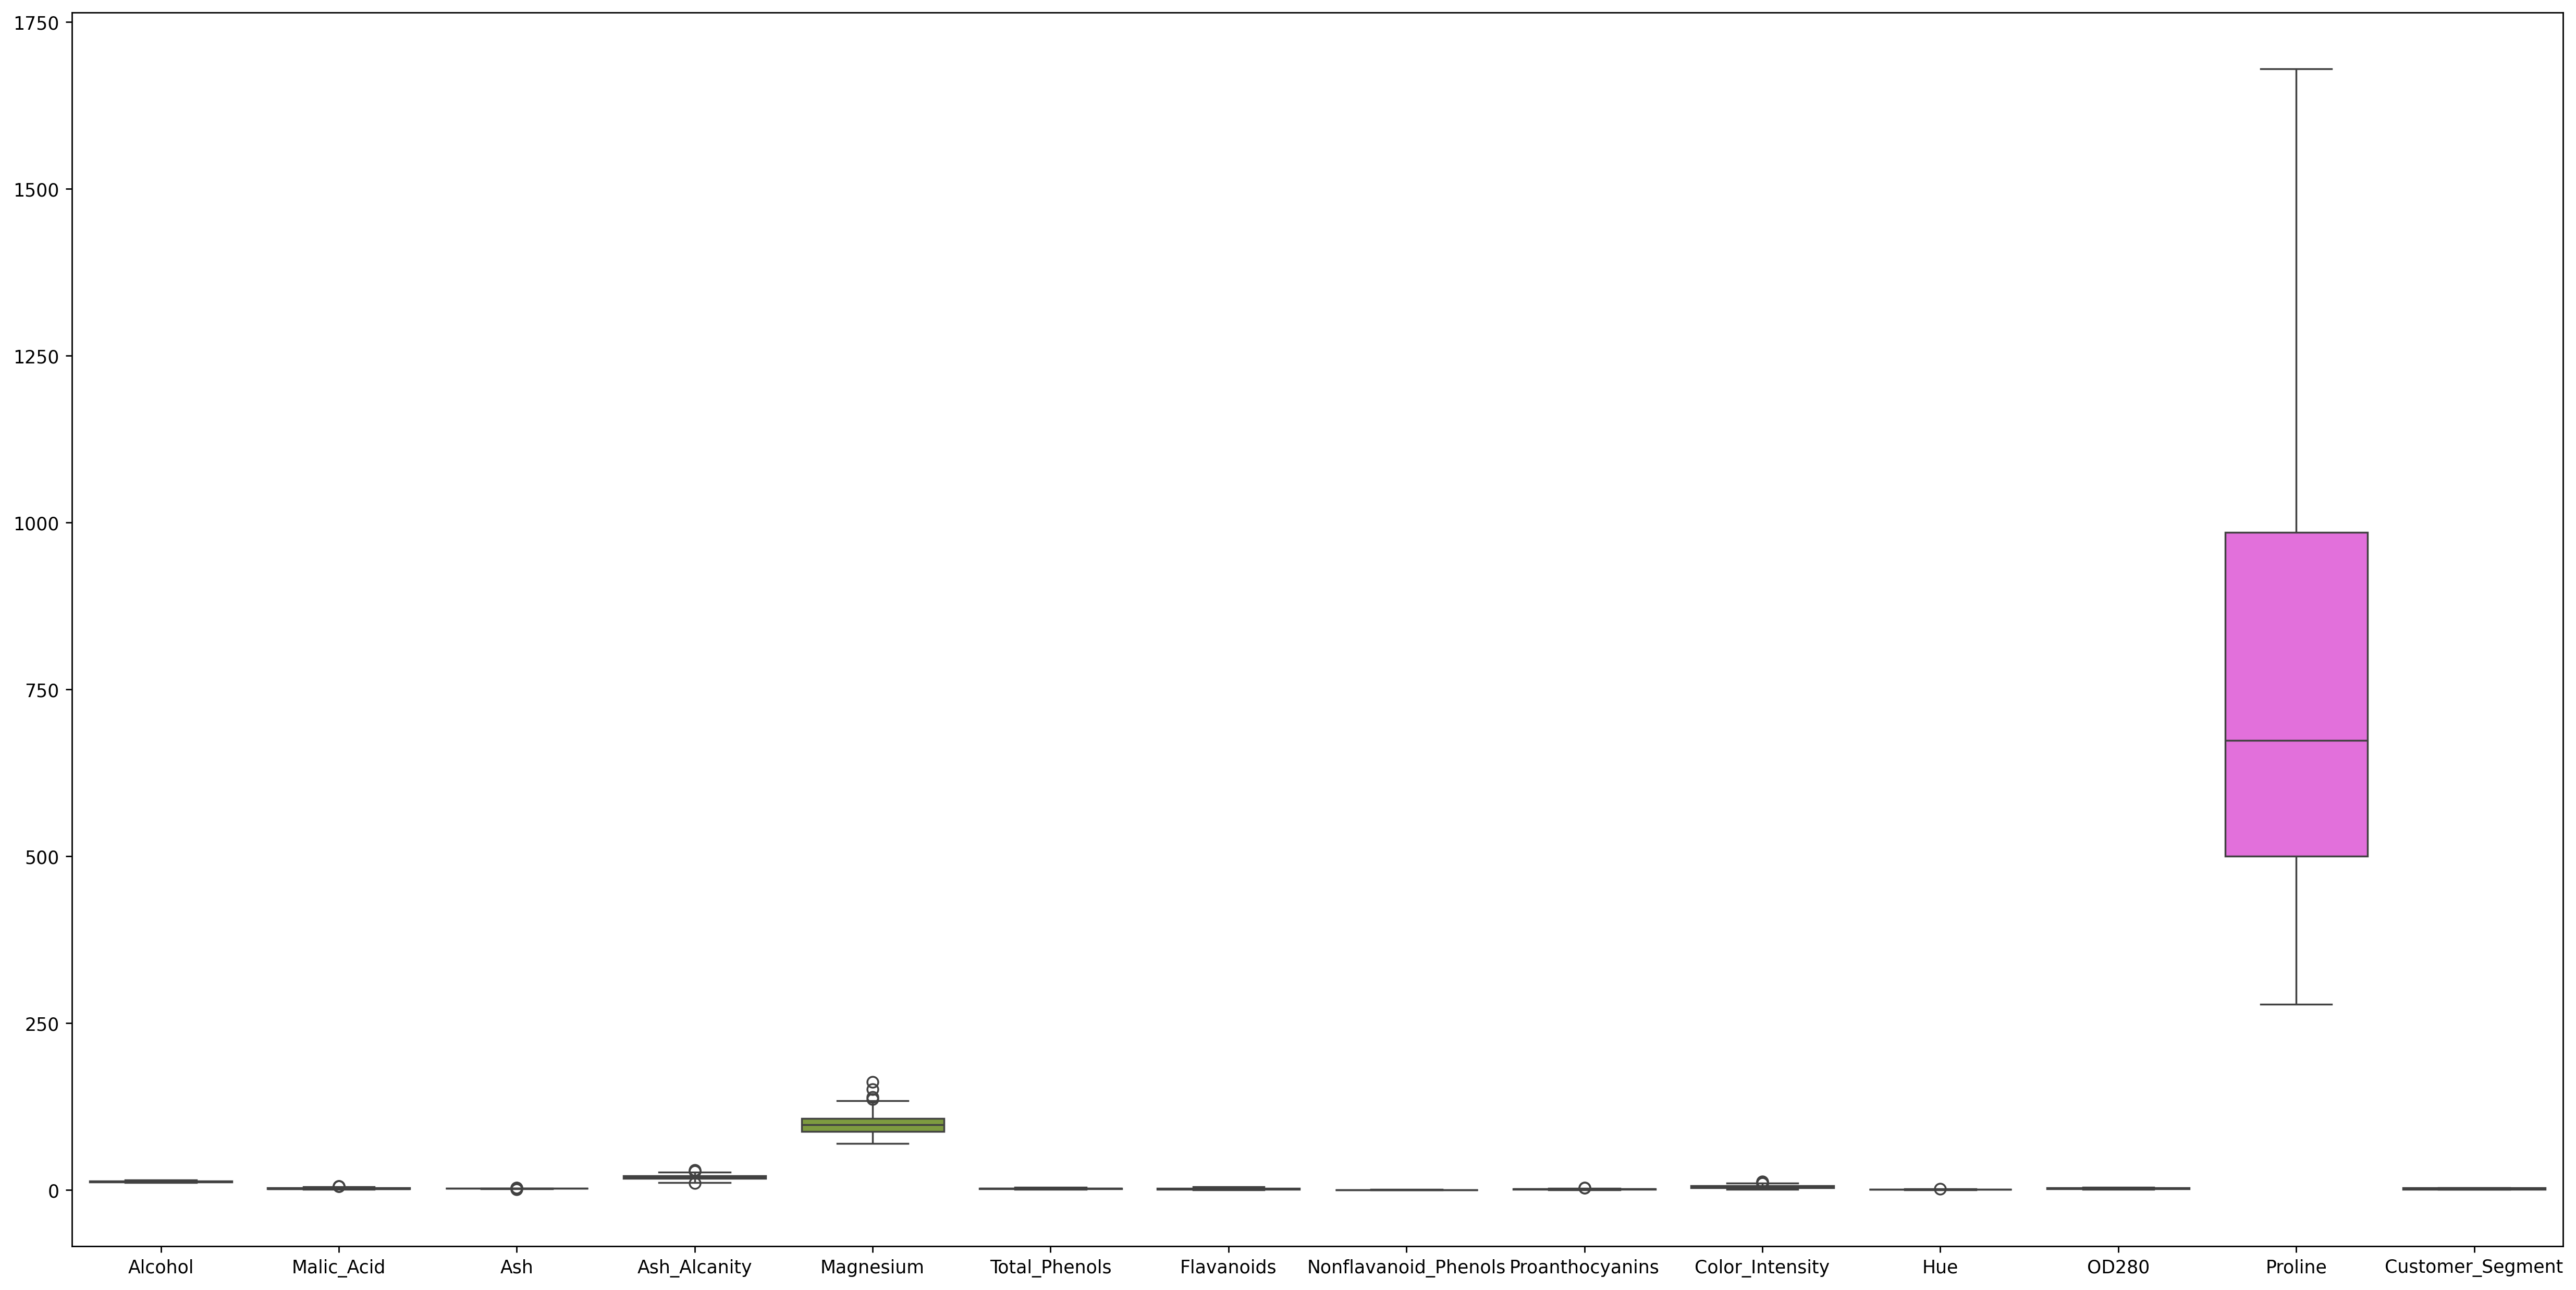

In [32]:
# boxplot for outliers
sns.boxplot(df)
plt.rcParams['figure.figsize'] = (20, 8)
plt.tight_layout()

In [33]:
# capping the outliers because dataset is very small
df.shape

(178, 14)

In [ ]:
# As I can see in the boxplot there are some columns having outliers
# I will cap them by using capping method

In [34]:
# defining capping function
def capping(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        IQR = q3 - q1
        lower = q1 - (1.5 * IQR)
        upper = q3 + (1.5 * IQR)
        data[col] = np.where(data[col] < lower, lower, np.where(data[col] > upper, upper, data[col]))

In [35]:
# capping the outliers
capping(df, df.columns)

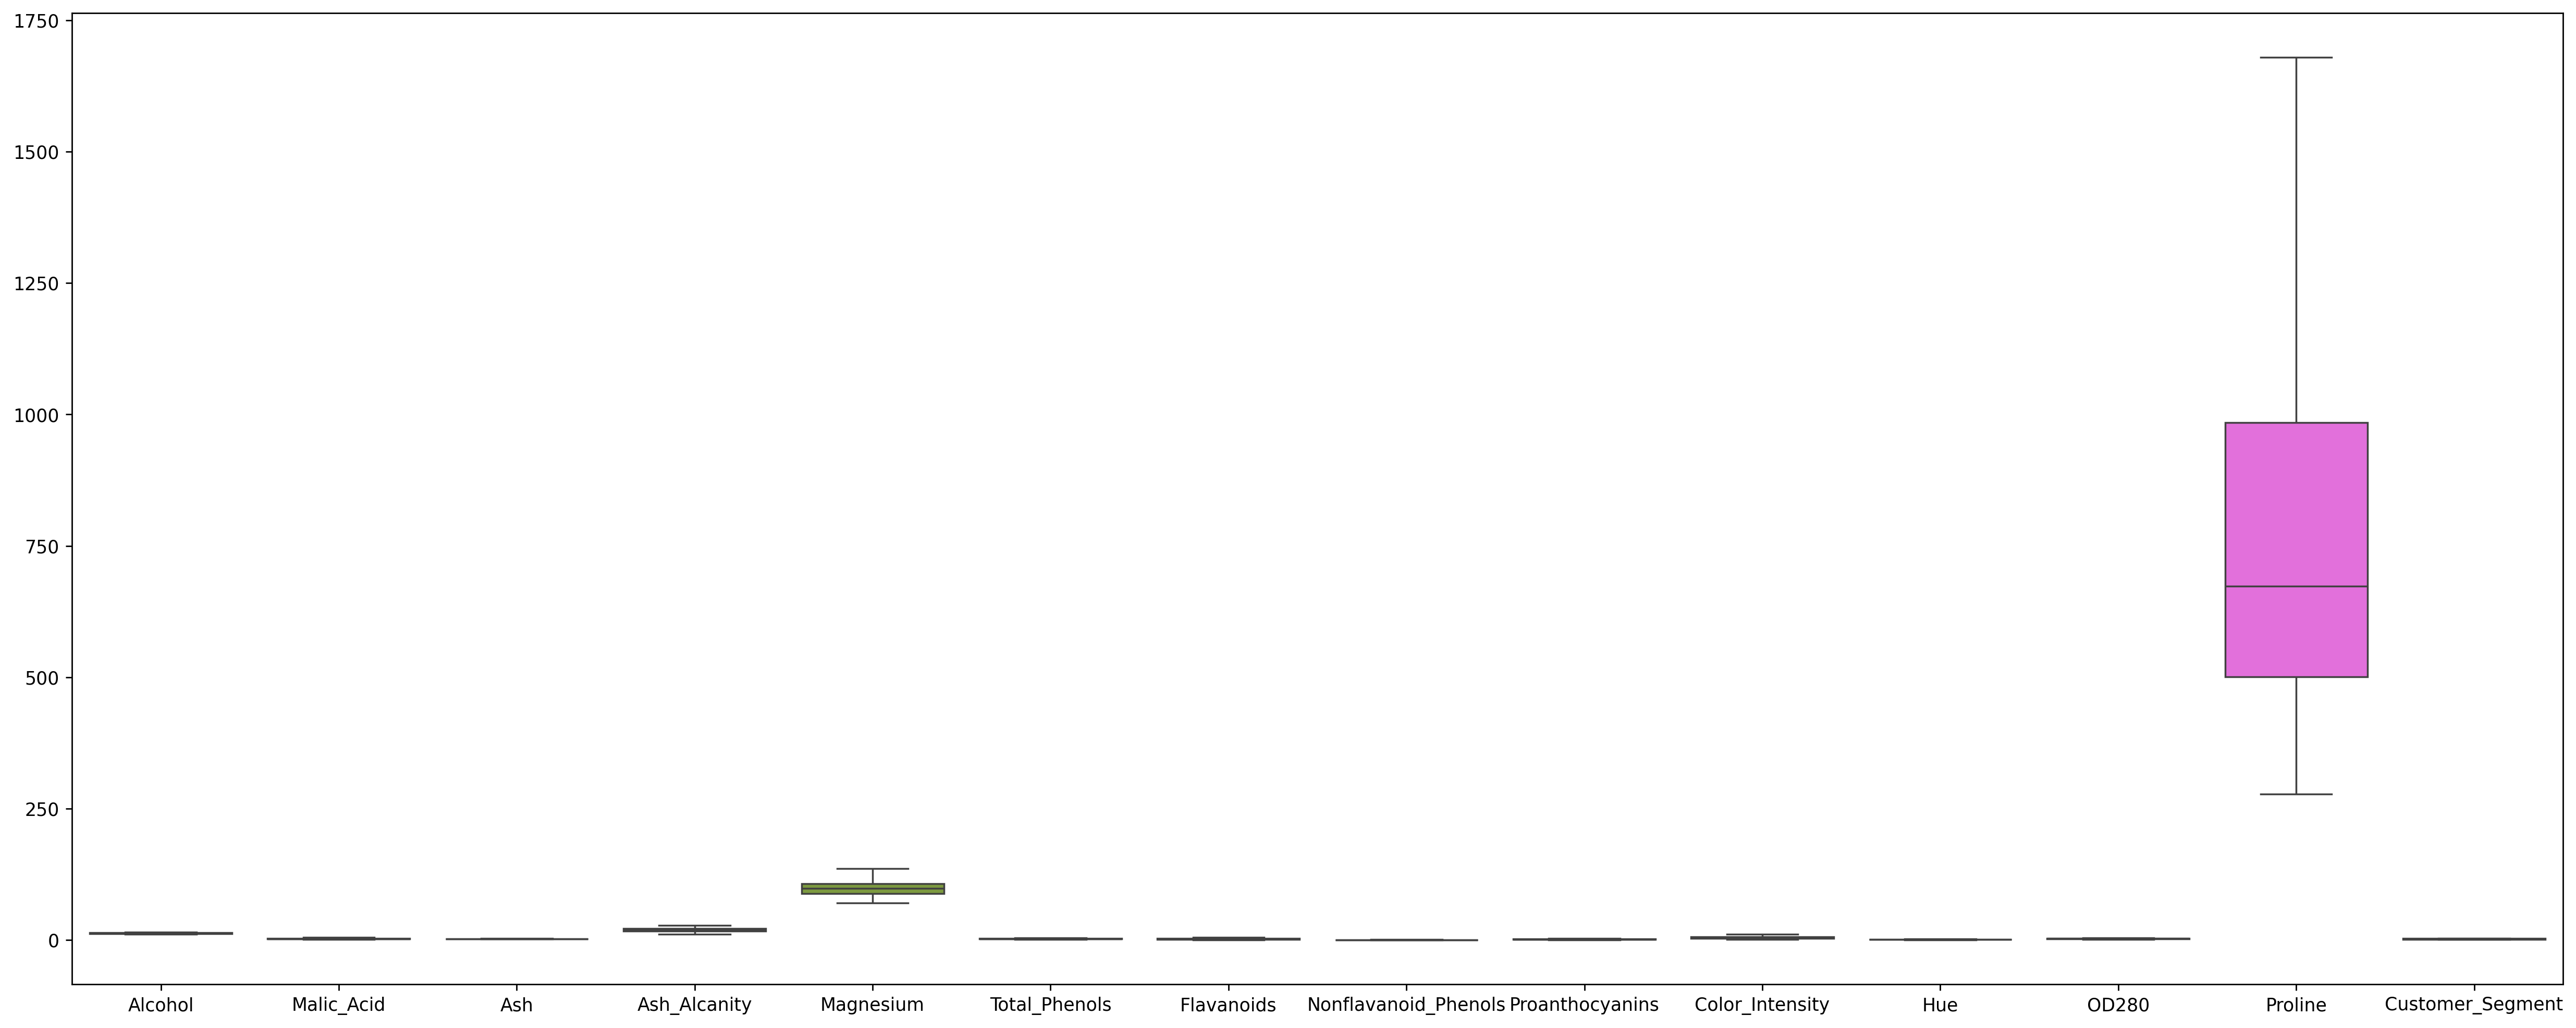

In [36]:
# cross checking wether outliers removed or not
# boxplot
sns.boxplot(df)
plt.rcParams['figure.figsize'] = (20, 8)
plt.tight_layout()

In [ ]:
# outlierd reoved

# FEATURE ENGINEERING
# (FEATURE SELECTION)

### method (1) : rfecv method

In [40]:
from yellowbrick.model_selection import rfecv

In [41]:
df.head(2)

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6      127.0           2.80   
1    13.20        1.78  2.14          11.2      100.0           2.65   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   

   OD280  Proline  Customer_Segment  
0   3.92   1065.0               1.0  
1   3.40   1050.0               1.0

In [42]:
x = df.loc[:, 'Alcohol':'Proline']
y = df['Customer_Segment']

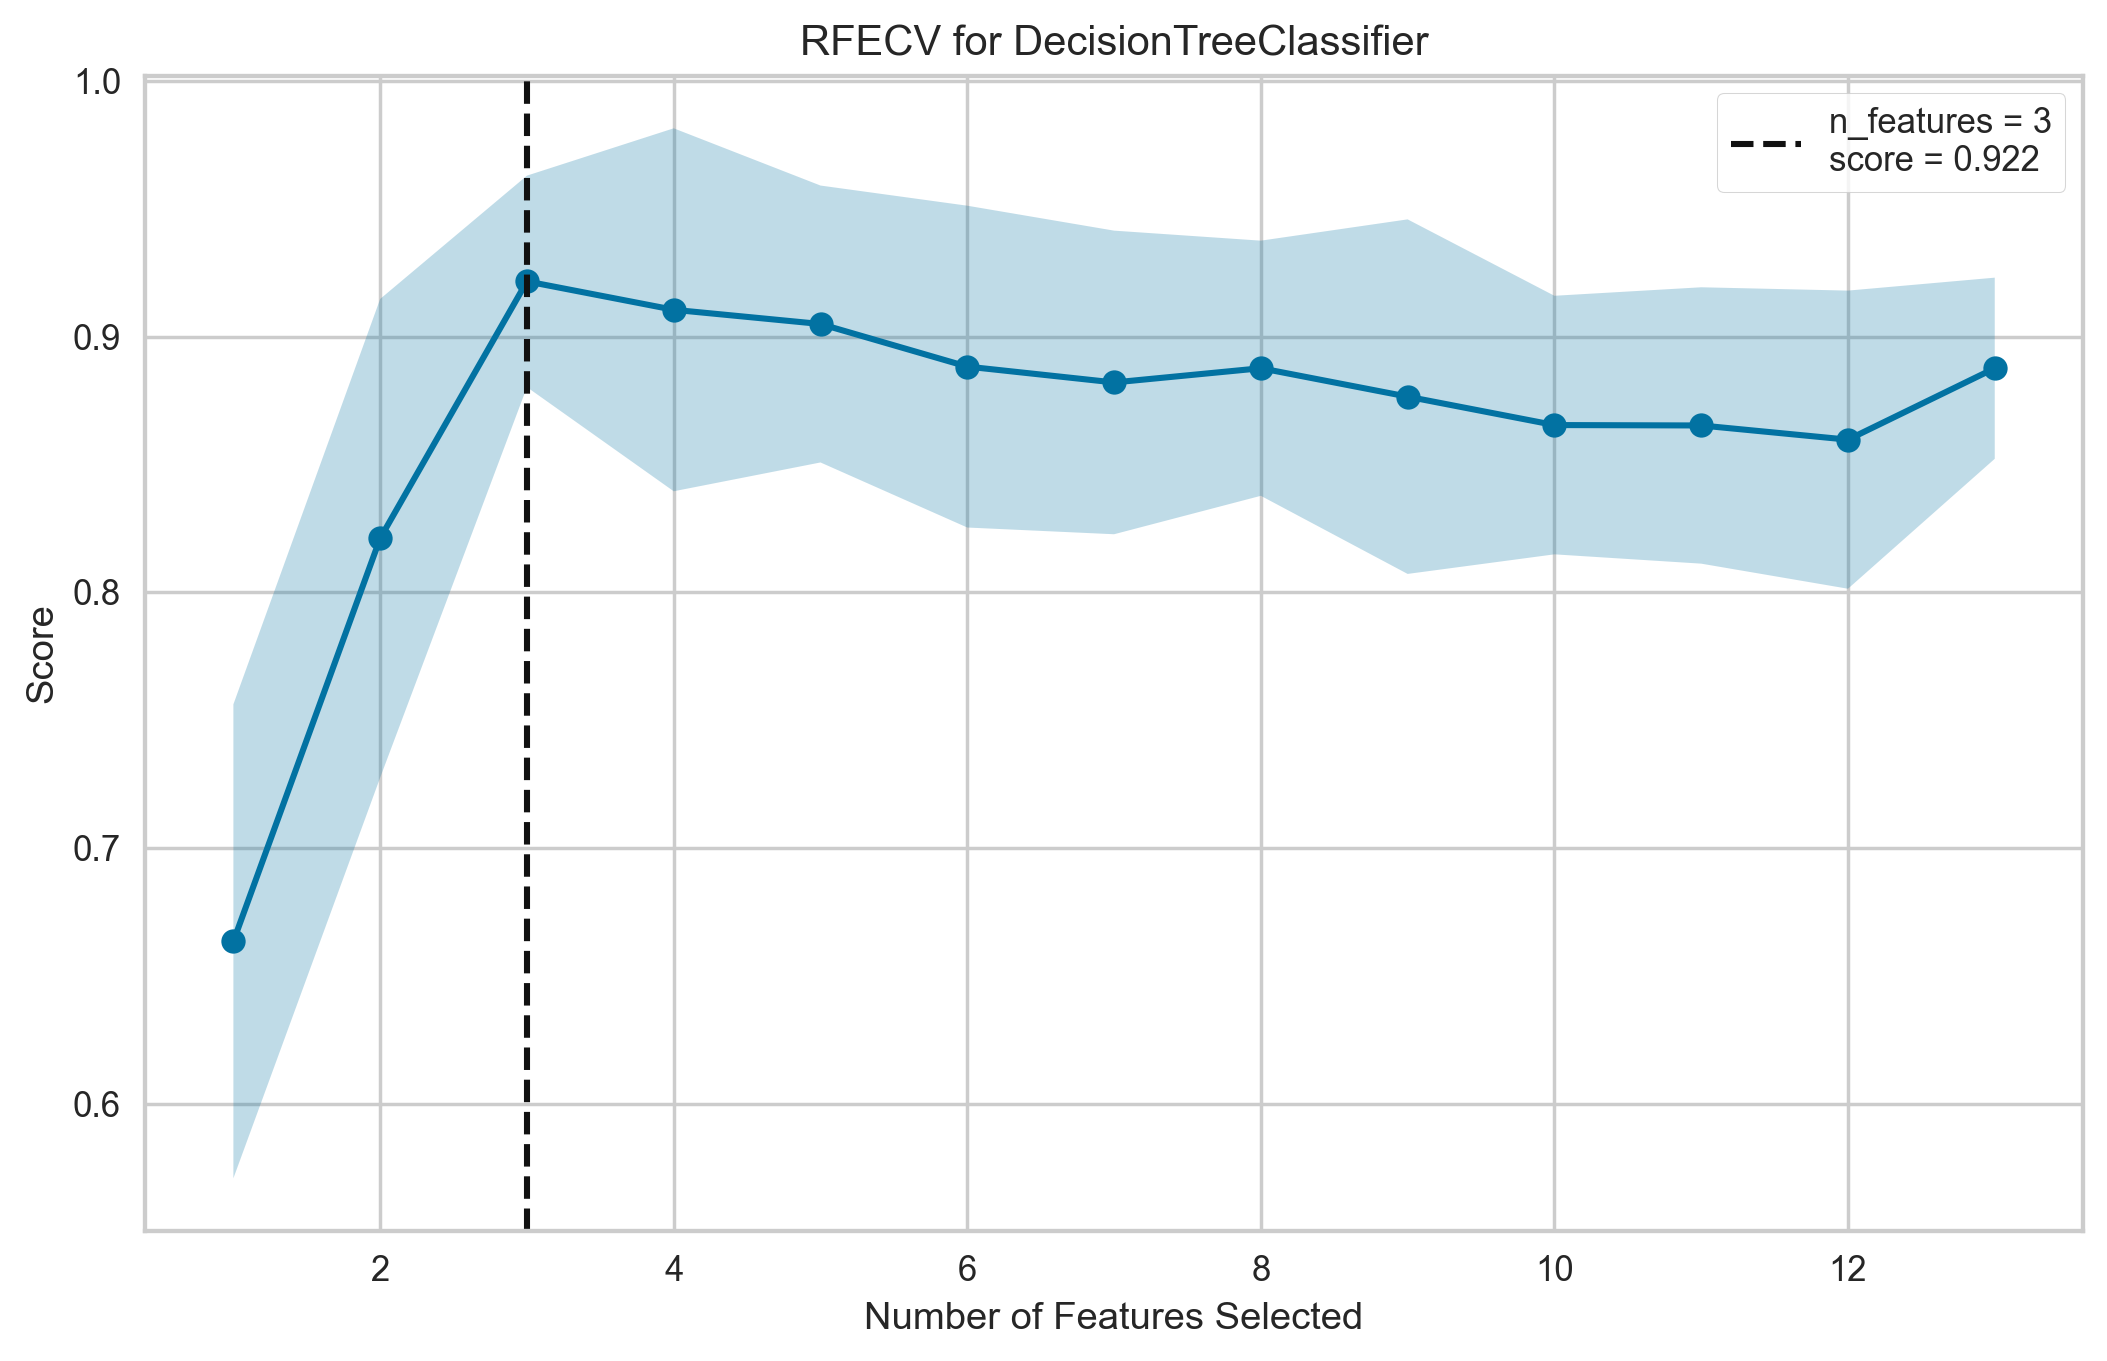

In [44]:
rfe = rfecv(DecisionTreeClassifier(), x, y)

In [ ]:
# it is saying that only 3 featrures are important to predict Customer_Segment
# and if these will give me accuracy of 92%

In [49]:
# aksing for those columns
rank = rfe.ranking_
rank

array([ 3, 11, 10,  9,  5,  8,  1,  7,  6,  4,  2,  1,  1])

In [54]:
pd.DataFrame({
    'rank': rank,
    'features' : x.columns
}).sort_values(by='rank')

rank              features
6      1            Flavanoids
11     1                 OD280
12     1               Proline
10     2                   Hue
0      3               Alcohol
9      4       Color_Intensity
4      5             Magnesium
8      6       Proanthocyanins
7      7  Nonflavanoid_Phenols
5      8         Total_Phenols
3      9          Ash_Alcanity
2     10                   Ash
1     11            Malic_Acid

In [ ]:
# it is saying Flavanoids, OD280, Proline columns are important only

## method(2) : Tree based method

In [56]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x, y)

DecisionTreeClassifier(criterion='entropy')

In [57]:
# asking for feature importance
dt.feature_importances_

array([0.01412373, 0.        , 0.        , 0.02525179, 0.        ,
       0.        , 0.41284534, 0.        , 0.        , 0.22278576,
       0.01163563, 0.        , 0.31335775])

In [61]:
# converting  to dataframe to see the information gain of each columns
pd.DataFrame({
    'IMPORTANCE' : dt.feature_importances_,
    'FEATURES' : x.columns
}).sort_values(by='IMPORTANCE', ascending=False)

IMPORTANCE              FEATURES
6     0.412845            Flavanoids
12    0.313358               Proline
9     0.222786       Color_Intensity
3     0.025252          Ash_Alcanity
0     0.014124               Alcohol
10    0.011636                   Hue
1     0.000000            Malic_Acid
2     0.000000                   Ash
4     0.000000             Magnesium
5     0.000000         Total_Phenols
7     0.000000  Nonflavanoid_Phenols
8     0.000000       Proanthocyanins
11    0.000000                 OD280

# although  I have a small dataset so I will proceed with all the columns for now

# DATA TRANSFORMATION

In [ ]:
# it is mendatory to perform scalling on the dataset because
# in SVM distance calculations is incvolved

In [63]:
# Standardization
sc = StandardScaler()
x_scalled = sc.fit_transform(x)
x_scalled

array([[ 1.51861254, -0.56553422,  0.24064008, ...,  0.36660959,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.50172839, -0.86217567, ...,  0.41076822,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02694849,  1.15331518, ...,  0.32245097,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.77705125, -0.40583812, ..., -1.6205284 ,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.23659622,  0.0124713 , ..., -1.57636978,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.61297912,  1.41951209, ..., -1.53221115,
        -1.42894777, -0.59516041]])

In [72]:
# see the transformation of the data
xd_scalled = pd.DataFrame(x_scalled, columns=x.columns)
xd_scalled.head()

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  1.518613   -0.565534  0.240640     -1.182882   2.057111       0.808997   
1  0.246290   -0.501728 -0.862176     -2.524956   0.038639       0.568648   
2  0.196879    0.026948  1.153315     -0.267832   0.113397       0.808997   
3  1.691550   -0.346771  0.506837     -0.816862   1.010496       2.491446   
4  0.295700    0.236596  1.913878      0.464208   1.384287       0.808997   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    1.034819             -0.659563         1.264740         0.266954   
1    0.733629             -0.820719        -0.549904        -0.291923   
2    1.215533             -0.498407         2.199012         0.284696   
3    1.466525             -0.981875         1.067105         1.225029   
4    0.663351              0.226796         0.420301        -0.318536   

        Hue     OD280   Proline  
0  0.366610  1.847920  1.013009  
1  0.410768  1.113449  0.965242  
2  0.322451  0.788587  1.395148  
3 -0.428246  1.184071  2.334574  
4  0.366610  0.449601 -0.037874

# MODEL BUILDING

In [74]:
# SPLITTING DATA IN TRAINING AND TESTING PART
xtrain, xtest, ytrain, ytest = train_test_split(xd_scalled, y, test_size=0.20, random_state=42)
xtrain.head()

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
158  1.654492   -0.592880  1.267400      1.684275  -0.110877       0.808997   
137 -0.581338    2.709072  1.039231      1.684275  -0.260394      -0.809357   
98  -0.778980   -1.148902 -1.014288     -0.298334  -0.858460       1.962676   
159  0.592164   -0.601995  1.039231      0.921733  -0.783701       0.488531   
38   0.085705   -0.756952 -1.014288     -1.213384  -0.110877       0.168065   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
158   -0.722123              1.354888         2.001378         2.498027   
137   -1.434939              2.160669        -0.873306        -0.016920   
98     1.727556             -0.981875         0.653869        -0.238696   
159   -0.932956              1.274310         1.264740         2.498027   
38     0.613153             -0.659563        -0.388203        -0.593539   

          Hue     OD280   Proline  
158 -1.708846 -0.920468 -0.276711  
137 -0.604880 -1.301828 -0.738463  
98   0.366610  0.223610 -0.276711  
159 -1.708846 -1.174708 -0.404091  
38   0.984830  0.110615  0.869707

In [75]:
# object for model class
svc = SVC()
# model trainning
svc.fit(xtrain, ytrain)
# getting prediction
ypred = svc.predict(xtest)
ypred

array([1., 1., 3., 1., 2., 1., 2., 3., 2., 3., 1., 3., 1., 2., 1., 2., 2.,
       2., 1., 2., 1., 2., 2., 3., 3., 3., 2., 2., 2., 1., 1., 2., 3., 1.,
       1., 1.])

In [77]:
# checking performance
print(f'training accuracy: {svc.score(xtrain, ytrain)}')
print(f'training accuracy: {svc.score(xtest, ytest)}')

training accuracy: 1.0
training accuracy: 1.0


In [ ]:
# I am getting a generalized model so I don't need to perform hyperparameter tunning